## Install Relevant Library

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


## Import Relevant Library

In [2]:
import pandas as pd

In [3]:
extracted_data = pd.read_csv('Automobiles.csv')

In [4]:
extracted_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
extracted_data.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

In [6]:
clean_data = extracted_data

clean_data.describe().T

In [7]:
clean_data.drop(['symboling' , 'normalized_losses' ,'engine_location' , 'wheel_base' , 'length' , 'width' , 'height' , 'curb_weight' , 'number_of_cylinders' , 'fuel_system' , 'bore' , 'stroke' ,'compression_ratio' , 'peak_rpm'] , axis=1 , inplace = True)


In [8]:
clean_data['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [9]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,201.0,126.875622,41.546834,61.0,98.0,120.0,141.0,326.0
horsepower,201.0,103.263682,37.389372,48.0,70.0,95.0,116.0,262.0
city_mpg,201.0,25.179104,6.423220,13.0,19.0,24.0,30.0,49.0
highway_mpg,201.0,30.686567,6.815150,16.0,25.0,30.0,34.0,54.0
price,201.0,13207.129353,7947.066342,5118.0,7775.0,10295.0,16500.0,45400.0


## Mapping Our Inputs

In [10]:
car_make_map = {'toyota' :  1 ,
'mazda'   :      1  ,
'nissan'   :   0 ,    
'honda'   :  1  ,   
'volkswagen' :  1 ,   
'subaru'    :  0   ,  
'mitsubishi'  :  0    ,
'volvo'  :  1   ,      
'mercedes-benz' : 1  , 
'bmw'   :  1   ,      
'saab' :  0    ,       
'dodge' :  0  ,         
'audi' :    1  ,      
'plymouth'   :  0    , 
'porsche' :  1   ,    
'jaguar'   :  1     , 
'chevrolet'    : 0    ,
'alfa-romero'   :  0  ,
'renault' :         0 ,
'mercury'  :   0  ,    
'peugot'  :   0       }

clean_data['make'] = clean_data['make'].map(car_make_map)

In [11]:
fuel_type_map = {'gas' : 0, 
                'diesel' : 1}

clean_data['fuel_type'] = clean_data['fuel_type'].map(fuel_type_map)

In [12]:
aspiration_map = {'std' : 0, 
                'turbo' : 1}

clean_data['aspiration'] = clean_data['aspiration'].map(aspiration_map)

In [13]:
doors_map = {'two' : 0, 
                'four' : 1}

clean_data['number_of_doors'] = clean_data['number_of_doors'].map(doors_map)

In [14]:
body_style_map = {'sedan' : 0, 
                'hatchback' : 1 , 
                 'wagon' : 1 ,
                 'hardtop' : 1 ,
                 'convertible' : 1}

clean_data['body_style'] = clean_data['body_style'].map(body_style_map)

In [15]:
drive_wheels_map = {'fwd' : 0, 
                'rwd' : 1 , 
                 '4wd' : 1}

clean_data['drive_wheels'] = clean_data['drive_wheels'].map(drive_wheels_map)

In [16]:
engine_type_map = {'ohc' : 0 ,
              'ohcf' : 1 ,
              'ohcv' : 2 ,
              'dohc' : 3 ,
               'l' : 4 ,
               'rotor' : 5}

clean_data['engine_type'] = clean_data['engine_type'].map(engine_type_map)

In [17]:
engine_median = clean_data['engine_size'].median()

def engine_in_size(size):
    if size < engine_median:
        return 0
    elif size > engine_median:
        return 1
    
clean_data['engine_size'] = clean_data['engine_size'].map(engine_in_size)

In [18]:
Phorse_median = clean_data['horsepower'].median()

def power_horse_median(size):
    if size < Phorse_median:
        return 0
    elif size > Phorse_median:
        return 1
    
clean_data['horsepower'] = clean_data['horsepower'].map(power_horse_median)

In [19]:
Cmpg_median = clean_data['city_mpg'].median()

def city_mpg_median(mpg):
    if mpg < Cmpg_median:
        return 0
    elif mpg > Cmpg_median:
        return 1
    
clean_data['city_mpg'] = clean_data['city_mpg'].map(city_mpg_median)

In [20]:
Hmpg_median = clean_data['highway_mpg'].median()

def highway_mpg_median(mpg):
    if mpg < Hmpg_median:
        return 0
    elif mpg > Hmpg_median:
        return 1
    
clean_data['highway_mpg'] = clean_data['highway_mpg'].map(highway_mpg_median)

In [21]:
clean_data.head()

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_type,engine_size,horsepower,city_mpg,highway_mpg,price
0,0.0,0,0,0,1,1,3,1.0,1.0,0.0,0.0,13495
1,0.0,0,0,0,1,1,3,1.0,1.0,0.0,0.0,16500
2,0.0,0,0,0,1,1,2,1.0,1.0,0.0,0.0,16500
3,1.0,0,0,1,0,0,0,0.0,1.0,NaN,NaN,13950
4,1.0,0,0,1,0,1,0,1.0,1.0,0.0,0.0,17450


In [22]:
clean_data.dropna(inplace = True)

In [23]:
automobile_data = clean_data

## Converting Float To Integer

In [24]:
automobile_data['make'] = automobile_data['make'].round().astype(int)

In [25]:
automobile_data['engine_size'] = automobile_data['engine_size'].round().astype(int)

In [26]:
automobile_data['horsepower'] = automobile_data['horsepower'].round().astype(int)

In [27]:
automobile_data['city_mpg'] = automobile_data['city_mpg'].round().astype(int)

In [28]:
automobile_data['highway_mpg'] = automobile_data['highway_mpg'].round().astype(int)

In [29]:
automobile_data.head() # confirming if we have converted our columns to whole numbers

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_type,engine_size,horsepower,city_mpg,highway_mpg,price
0,0,0,0,0,1,1,3,1,1,0,0,13495
1,0,0,0,0,1,1,3,1,1,0,0,16500
2,0,0,0,0,1,1,2,1,1,0,0,16500
4,1,0,0,1,0,1,0,1,1,0,0,17450
5,1,0,0,0,0,0,0,1,1,0,0,15250


## Mapping Our Target

In [30]:
# where 0 is less than median price , assuming it's cheaper and 1 more than the median price making it to be quite expensive . 
# Our 50% is 10295.0 where we obtained it from our descriptive data

In [31]:
Price_median = automobile_data['price'].median()

def price_median(amount):
    if amount < Price_median:
        return 0
    elif amount > Price_median:
        return 1
    
automobile_data['price'] = automobile_data['price'].map(price_median)

## Machine Learning Algorithm

## *Splitting*

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x = automobile_data.drop('price' , axis = 1)
y = automobile_data['price']

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state=42)

## Fitting The Algorithm

In [35]:
import xgboost as xgb

In [36]:
xgb_car_model = xgb.XGBClassifier()

In [37]:
xgb_car_model.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
y_train_pred = xgb_car_model.predict(x_train)

## Checking Accuracy Of The Model

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
training_accuracy = accuracy_score(y_train , y_train_pred)
percentage_form = training_accuracy * 100
print('Training Accuracy: {:.2f}%'.format(percentage_form))

Training Accuracy: 94.66%


In [41]:
y_test_pred = xgb_car_model.predict(x_test)

In [42]:
testing_accuracy = accuracy_score(y_test , y_test_pred)
percentage_form = testing_accuracy * 100
print('Testing Accuracy:{:.2f}%'.format(percentage_form))

Testing Accuracy:87.88%


## Visualizing

In [43]:
import matplotlib.pyplot as plt

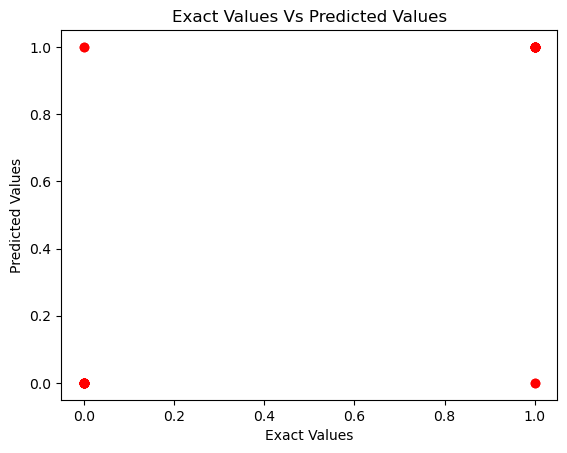

In [44]:
plt.scatter(y_test , y_test_pred , color = 'Red')
plt.xlabel('Exact Values')
plt.ylabel('Predicted Values')
plt.title('Exact Values Vs Predicted Values')
plt.show()

## *Lebogang Francis Sindani*